###  **Compute the total power and the PSD of noise signal**

Some defintions

1) **Power spectral density (PSD)** is a measure of power per unit frequency, with units in rad^2/Hz or V^2/Hz for phase and amplitude noise respectively. 


2) The **total noise power** is the integrated noise over the whole spectrum. E.g. If we have white noise of PSD α over a frequency band from 0 to 43 kHZ (the SPS revolution frequency). The total noise power would be α*43e3. For a statistical process the total noise power equals the variance (σ^2).


In [5]:
import numpy as np
import matplotlib.pyplot as plt

#### Function for creating the noise signal

In [6]:
def create_noise(N, colored=False):        
    if colored: # A.Wolski's method
        phi_0 = 1e-8  # amplitude of noise, aka stdPhaseNoise 
        Delta_psi = 0.18 # the peak of the spectrum

        psi_t_list = []
        psi_t = 0

        # parameters for ksi
        mean = 0.0
        std = 0.2
        for i in range(N):
            psi_t_list.append(psi_t)
            ksi = np.random.normal(mean, std)  # different seed on each turn
            psi_t = psi_t + 2 * np.pi * Delta_psi + 2 * np.pi * ksi

        # Construct the noise signal
        y = phi_0 * np.cos(psi_t_list)
        
    else:
        mu, stdPhaseNoise = 0, 1e-8
        y = np.random.normal(mu, stdPhaseNoise, N)
    
    return y

#### **Sanity check**: Plot the two noise signals

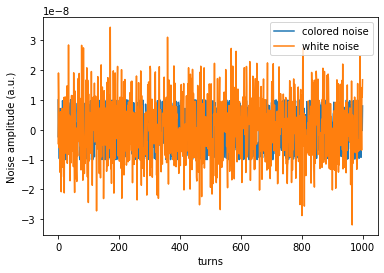

In [7]:
plt.plot(create_noise(1000, True), label='colored noise')
plt.plot(create_noise(1000, False), label='white noise')
plt.xlabel('turns')
plt.ylabel('Noise amplitude (a.u.)')
plt.legend()

#### Change to time instead of turns

In [8]:
frev = 43.45e3 # the revolution frequency of SPS
N = 1000 # define the length of the signal
time = np.arange(N)/frev

In [9]:
y_colored = create_noise(N, True)
y_white = create_noise(N, False)

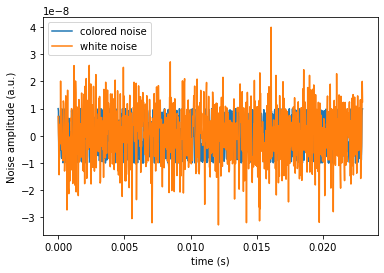

In [10]:
plt.plot(time, y_colored, label='colored noise')
plt.plot(time, y_white, label='white noise')
plt.xlabel('time (s)')
plt.ylabel('Noise amplitude (a.u.)')
plt.legend()

#### Compute the total **power** of the noise signal

In [11]:
Dt = time[1]-time[0] # sampling (s)

In [178]:
energy_white_list = []
for i in range(100):
    y_white = create_noise(N, False)
    energy_white = np.sum(y_white**2)*Dt
    #print(energy_white)
    energy_white_list.append(energy_white)

In [179]:
total_power = np.mean(energy_white_list)/time[-1]
print(total_power)

1.00245523407011e-16


In [180]:
np.var(y_white)

9.835454380931378e-17

In [181]:
# compute PSD

In [145]:
DFT = lambda k : np.sum(y_white*np.exp(-1j*2*np.pi*k*np.arange(N)/N))

In [146]:
my_dft = [DFT(k) for k in range(N)]

In [147]:
fft = np.fft.fft(y_white)

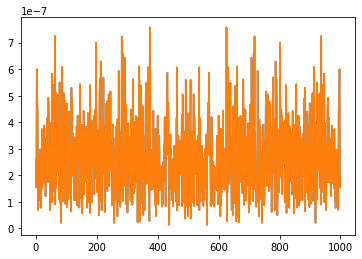

In [148]:
plt.plot(np.abs(my_dft))
plt.plot(np.abs(fft))

In [149]:
# Parseval's theorem 

In [150]:
freq = np.linspace(0, N/time[-1], N)

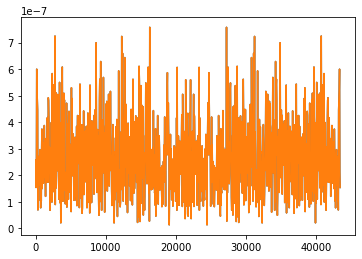

In [151]:
plt.plot(freq, np.abs(my_dft))
plt.plot(freq, np.abs(fft))

In [152]:
Df = freq[1]-freq[0]

In [153]:
power_white = np.sum(y_white**2)*Dt/time[-1]
power_white_fft = np.sum(np.abs(my_dft)**2)/N**2
print(power_white)
print(power_white_fft)

9.358284408353025e-17
9.348926123944725e-17


In [154]:
fft_list = []
for i in range(10000):
    y_white = create_noise(N, False)
    fft = np.fft.fft(y_white)
    fft_list.append(fft)

In [155]:
mean_dft = np.mean(np.abs(fft_list), axis=0)
PSD = mean_dft**2/(Df*N**2)

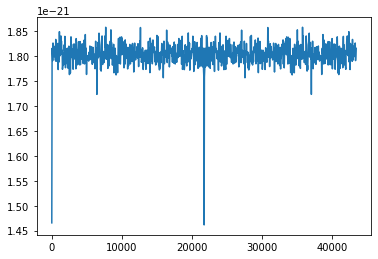

In [156]:
plt.plot(freq, PSD)

In [157]:
print(PSD[300])

1.7734045475493466e-21


In [158]:
# colored noise

In [159]:
fft_list = []
for i in range(10000):
    y_white = create_noise(N, True)
    fft = np.fft.fft(y_white)
    fft_list.append(fft)

In [160]:
mean_dft = np.mean(np.abs(fft_list), axis=0)
PSD = mean_dft**2/(Df*N**2)

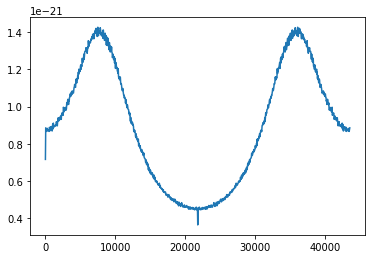

In [161]:
plt.plot(freq, PSD)

In [162]:
PSD[180]

1.4238932995481225e-21